In [ ]:
!pip install scikit-learn > None

In [ ]:
!pip install scipy > None

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import quantile_transform

In [166]:
df = pd.read_csv(r'C:\Users\Ксения\Project\Megy\content\O_nan.csv')

In [ ]:
df

In [167]:
nan_after = df.isna().sum()
print(f"Number of NaN values : {nan_after}")

Number of NaN values : Area/volume                                      0
Max/min(size)                                    0
org_coating_HAcceptors                           0
org_coating_LogP                                 0
common_spin                                      0
Effective anisotropy constant (J/m3)             0
magnetic anisotropy constant (J/m3)              0
magnetocrystalline anisotropy constant (J/m3)    0
Anisotropy constant                              0
Crystalline                                      0
MAE                                              0
Curie temperature (K)                            0
Spehricity                                       0
exchange constant (J/m) *10^-12                  0
Electronegativity core                           0
Space group                                      0
Demagnetization factors (Nd)                     0
Saturation magnetization (emu/g)                 0
Coercivity (Oe)                                  0
Remanenc

Преобразуем названия для хорошего показа графиков

In [168]:
df = df.rename(columns = {'Effective anisotropy constant (J/m3)': 'eff_anisotropy_const'})
df = df.rename(columns = {'Curie temperature (K)': 'curie_temperature'})
df = df.rename(columns = {'exchange constant (J/m) *10^-12': 'exchange_constant'})
df = df.rename(columns = {'Demagnetization factors (Nd)': 'demagnetization_factors'})
df = df.rename(columns = {'Saturation magnetization (emu/g)': 'saturation_magnetization'})
df = df.rename(columns = {'Max/min(size)': 'max/min'})
df = df.rename(columns = {'Coercivity (Oe)': 'coercivity'})
df = df.rename(columns = {'Remanence magnetization (emu/g)': 'remanence_magnetization'})
df = df.rename(columns = {'interdomain coupling (alpha)': 'interdomain_coupling'})
df = df.rename(columns = {'mass_magnetic_susceptibility(emu/Oe*g)': 'm_magnetic_susceptibility'})
df = df.rename(columns = {'magnetic anisotropy constant (J/m3)': 'magnetic_anisotropy'})
df = df.rename(columns = {'magnetocrystalline anisotropy constant (J/m3)': 'magnetocrystalline_anisotropy'})
df = df.rename(columns = {'magnetocrystalline anisotropy energy (MAE) (J/m3)': 'MAE'})

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area/volume                    568 non-null    float64
 1   Max/min                        568 non-null    float64
 2   org_coating_HAcceptors         568 non-null    float64
 3   org_coating_LogP               568 non-null    float64
 4   common_spin                    568 non-null    float64
 5   Eff_anisotropy_const           568 non-null    float64
 6   Magnetic_anisotropy            568 non-null    float64
 7   Magnetocrystalline_anisotropy  568 non-null    float64
 8   Anisotropy constant            568 non-null    float64
 9   Crystalline                    568 non-null    float64
 10  MAE                            568 non-null    float64
 11  Curie_temperature              568 non-null    float64
 12  Spehricity                     568 non-null    flo

In [ ]:
df.columns.tolist()

In [170]:
sns.set(style="whitegrid")

Видно, что колонки Eff_anisotropy, Electronegativity of core и Saturation magnetization имеют аномалии, которые можно удалить.
А вот Coercivity похоже на логарифмическое распределение

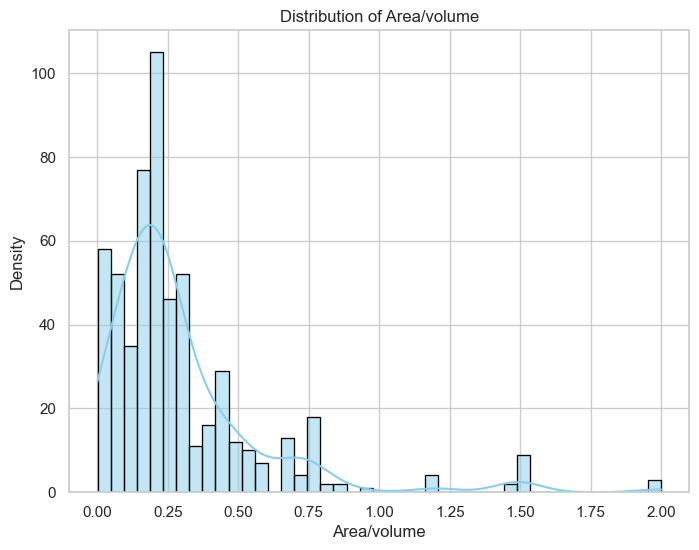

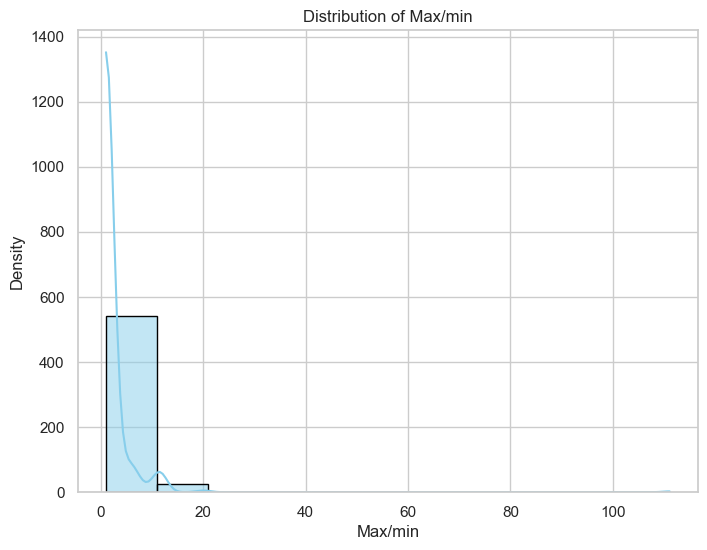

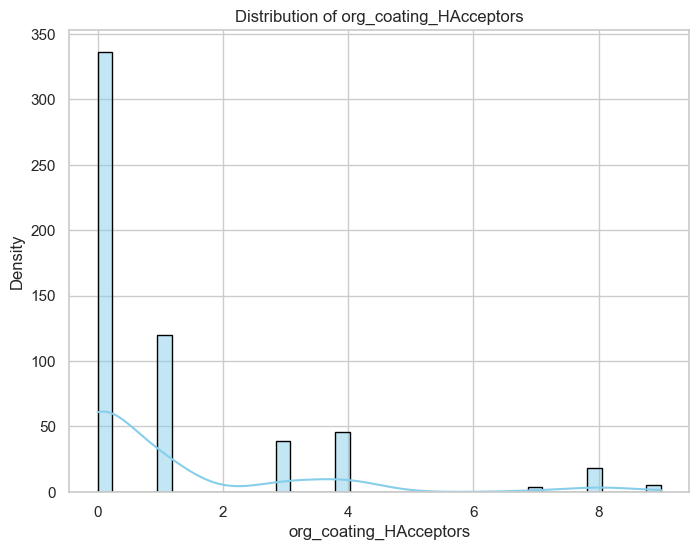

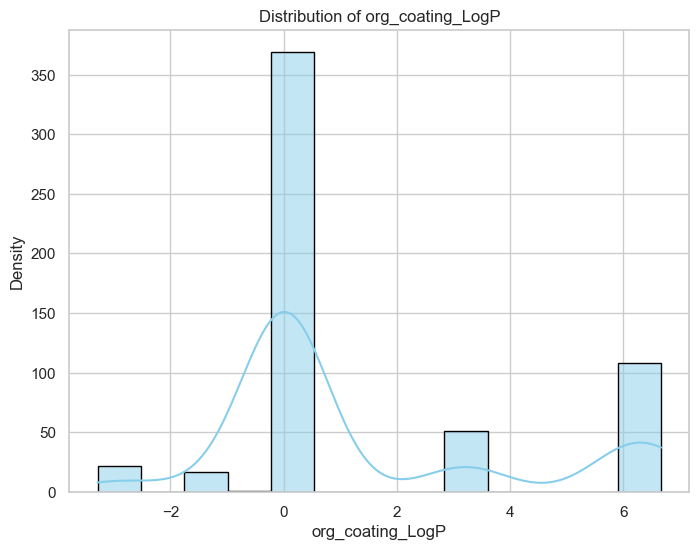

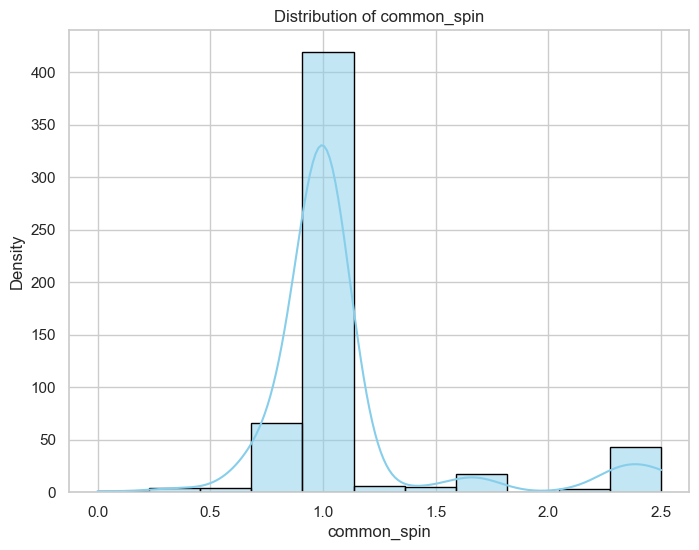

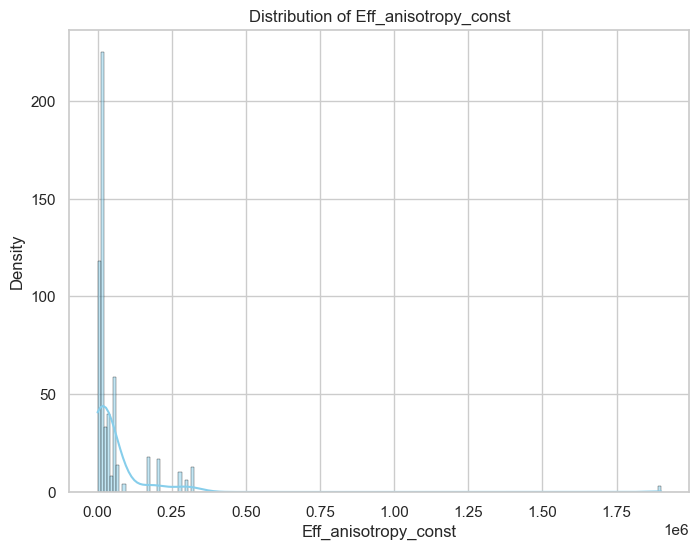

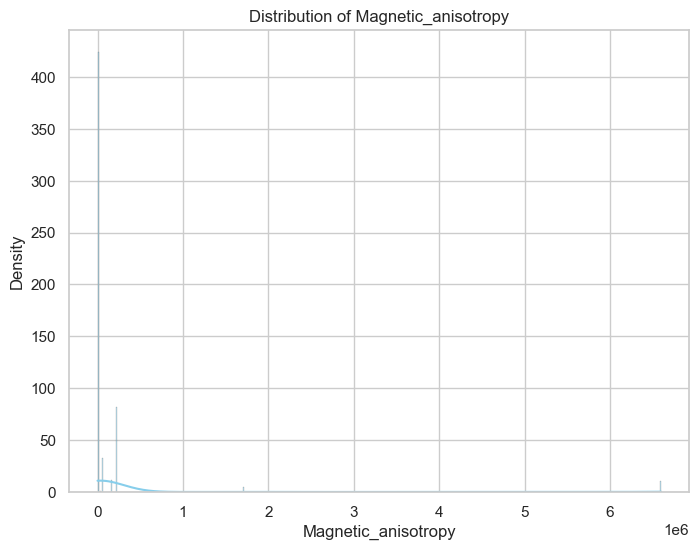

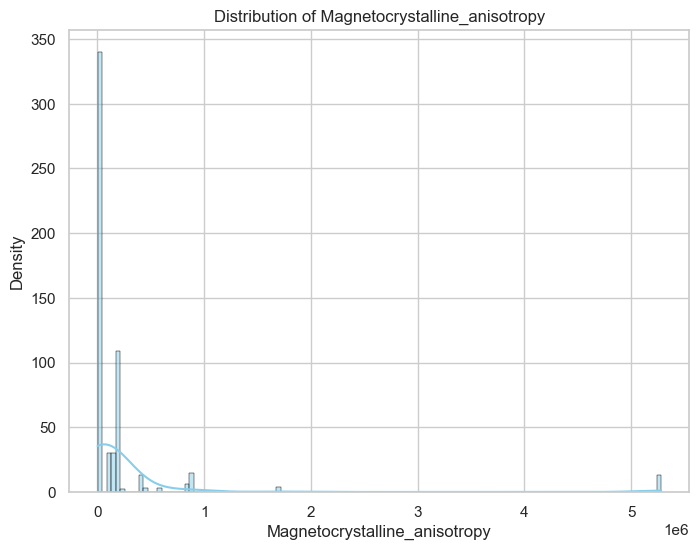

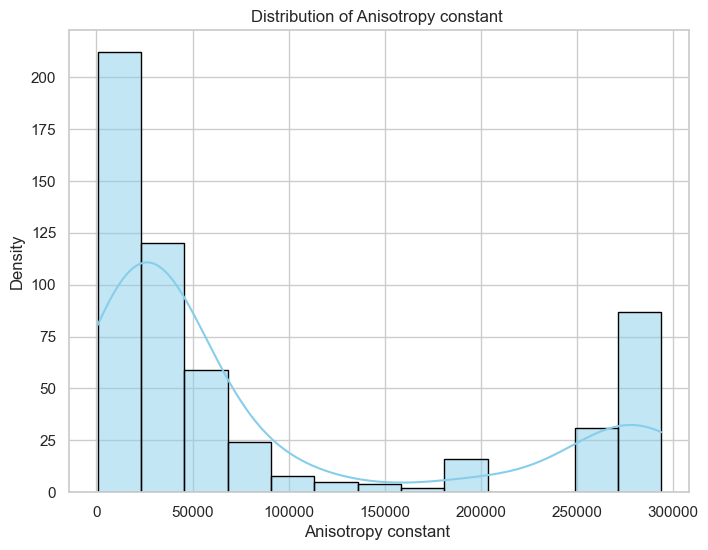

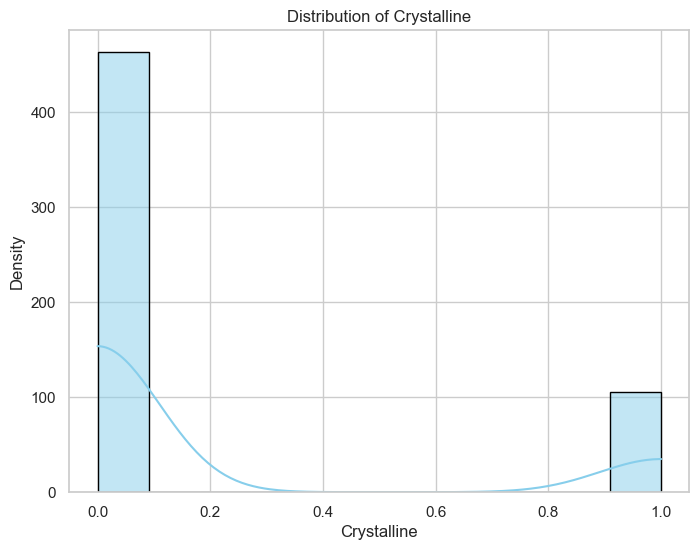

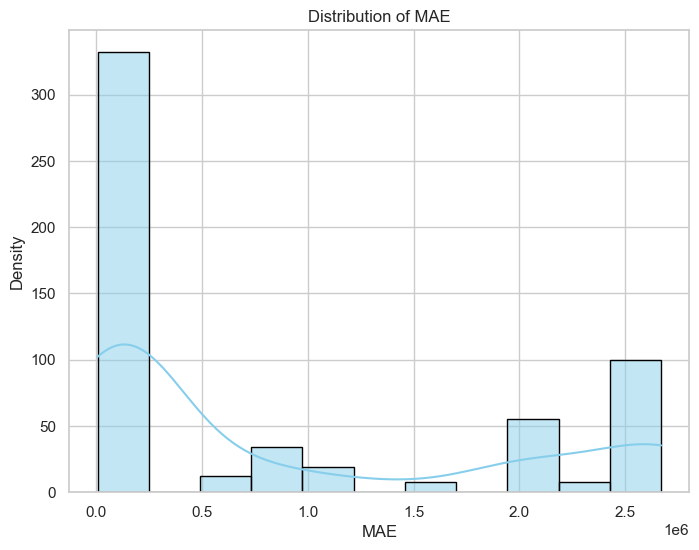

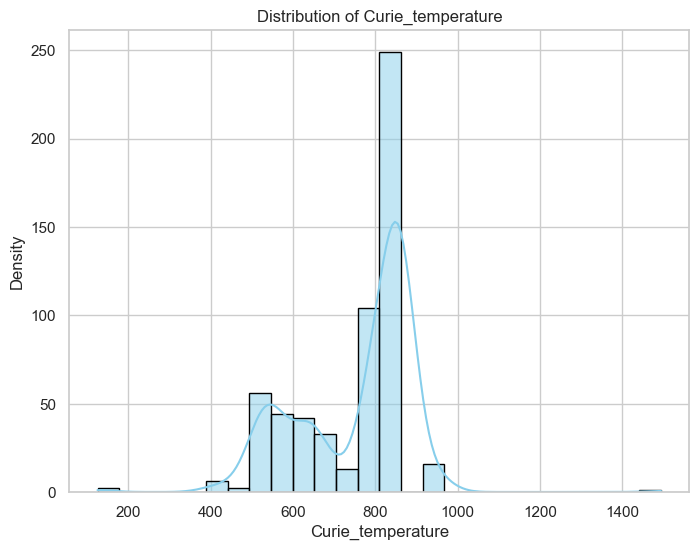

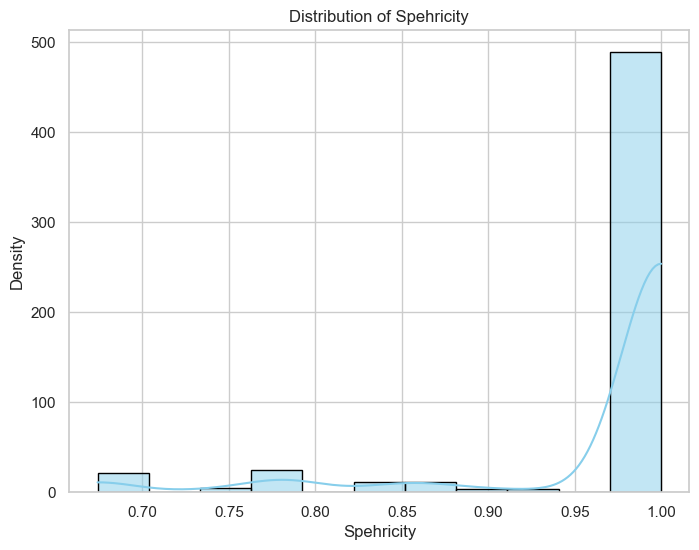

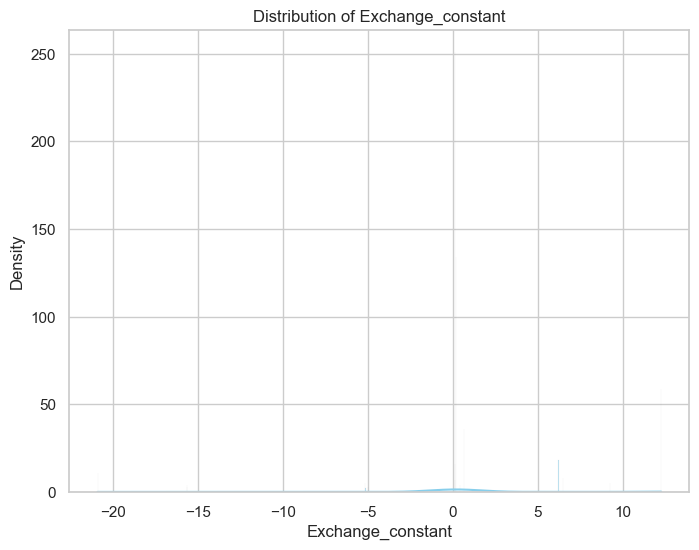

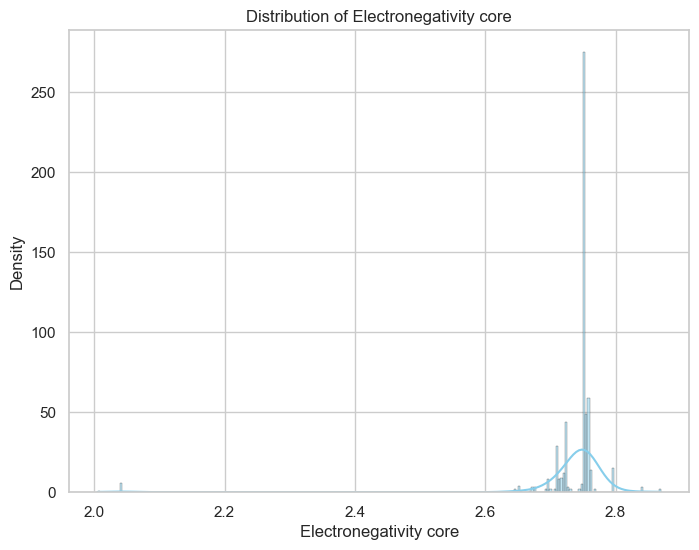

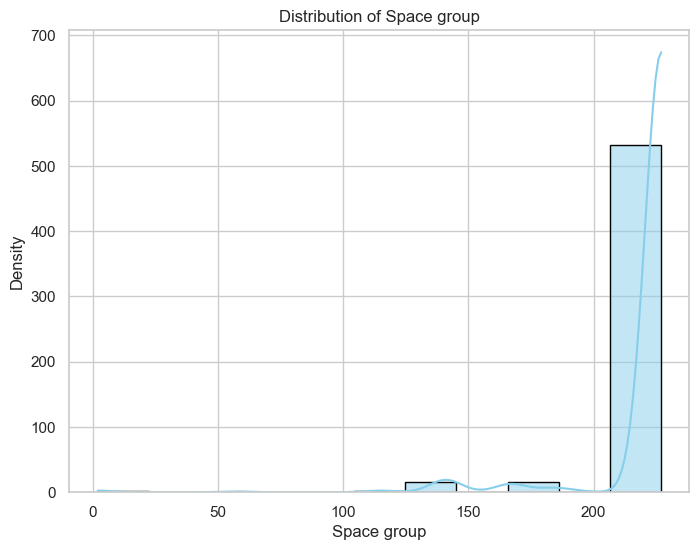

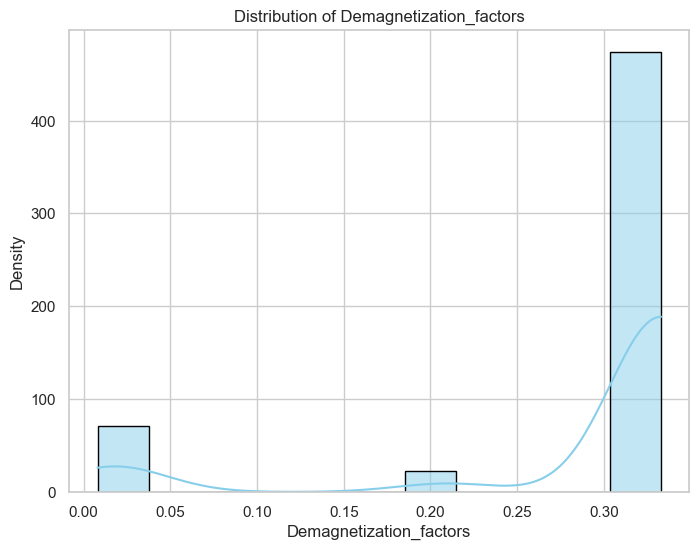

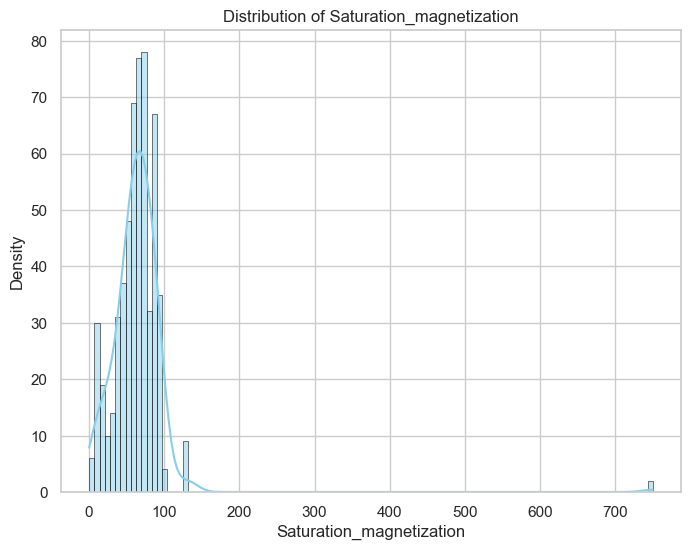

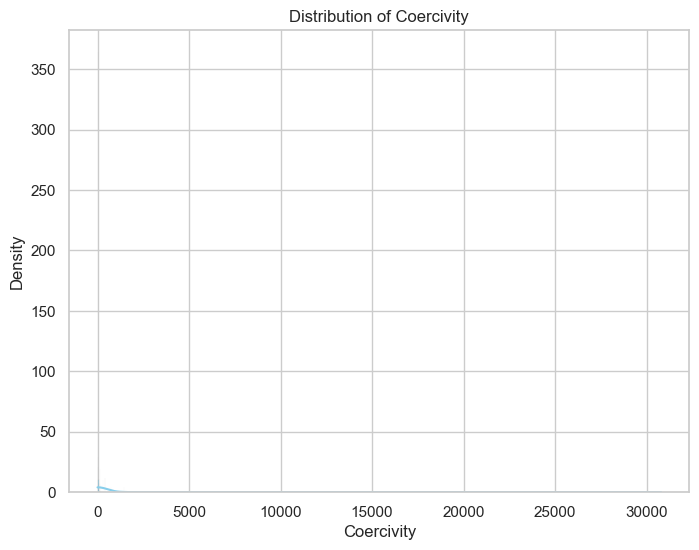

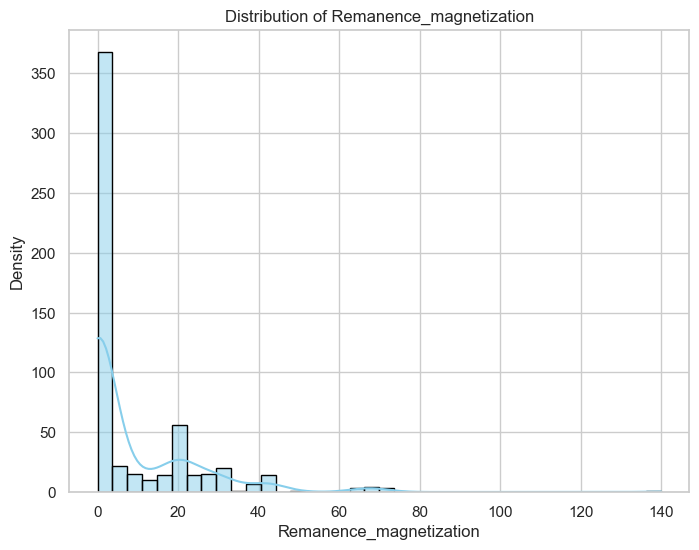

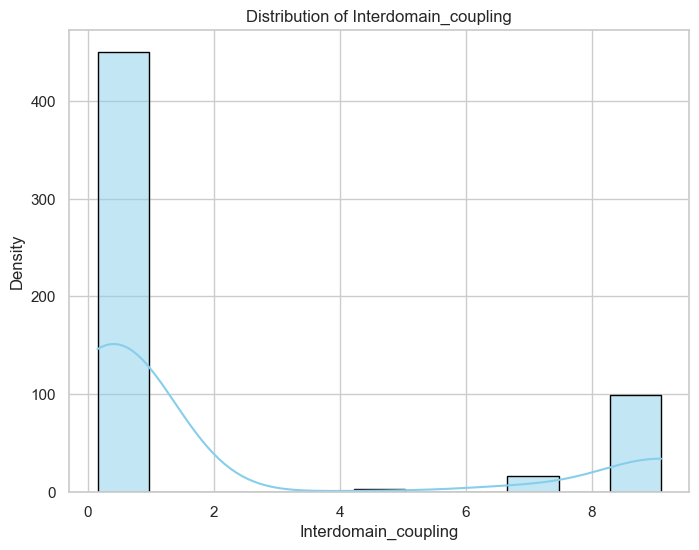

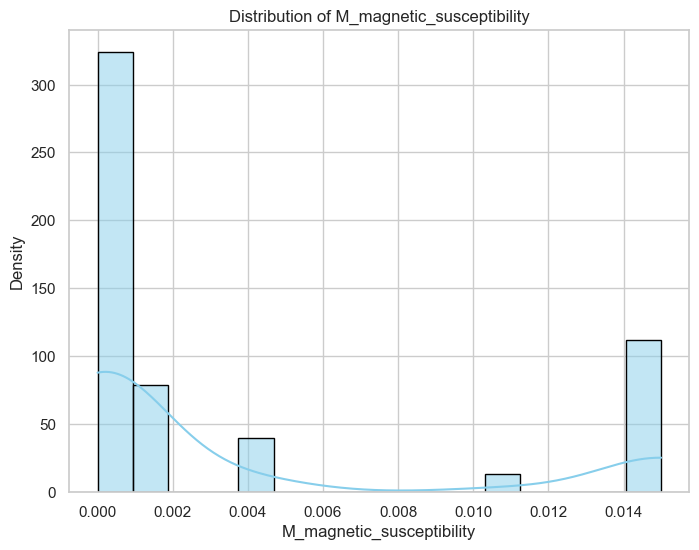

In [171]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

Составим списки, где значения справа будут убираться у колонок в списке columns_to_check_max, и левые у списка columns_to_check_min

In [ ]:
columns_to_check_max = ['Eff_anisotropy_const', 'Coercivity', 'Saturation_magnetization']
columns_to_check_min = ['Electronegativity core']

Максимальные значения columns_to_check_max, что мы удалили

In [ ]:
for column in columns_to_check_max:
    max_value = df[column].max()
    print(max_value)
    df = df[df[column] != max_value]

Значение columns_to_check_min, что мы удалили

In [ ]:
for column in columns_to_check_min:
    min_value = df[column].min()
    print(min_value)
    df = df[df[column] != min_value]

Так как распределение на вид логарифмическое, то нормализуем его соответственно

In [172]:
coer = df['Coercivity']

In [173]:
#df['Coercivity'] = np.log1p(df['Coercivity'])
df['Coercivity'] = np.log10(df['Coercivity'])

c:\Users\Ксения\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#df['Coercivity'] = boxcox(df['Coercivity'] + 1)[0]  # +1 используется для избежания проблем с логарифмом для нулевых значений

#scaler = StandardScaler()
#df['Coercivity'] = scaler.fit_transform(df[['Coercivity']])

In [174]:
# Подсчет пропущенных значений в каждом столбце
missing_values  = df.isnull().sum()
print(missing_values, df.info(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area/volume                    568 non-null    float64
 1   Max/min                        568 non-null    float64
 2   org_coating_HAcceptors         568 non-null    float64
 3   org_coating_LogP               568 non-null    float64
 4   common_spin                    568 non-null    float64
 5   Eff_anisotropy_const           568 non-null    float64
 6   Magnetic_anisotropy            568 non-null    float64
 7   Magnetocrystalline_anisotropy  568 non-null    float64
 8   Anisotropy constant            568 non-null    float64
 9   Crystalline                    568 non-null    float64
 10  MAE                            568 non-null    float64
 11  Curie_temperature              568 non-null    float64
 12  Spehricity                     568 non-null    flo

In [ ]:
#df['Coercivity'] = quantile_transform(df[['Coercivity']], n_quantiles=562, output_distribution='normal')

Вот какой график получился после преобразования логарифмической величины 'Coercivity'

<Axes: xlabel='Coercivity', ylabel='Count'>

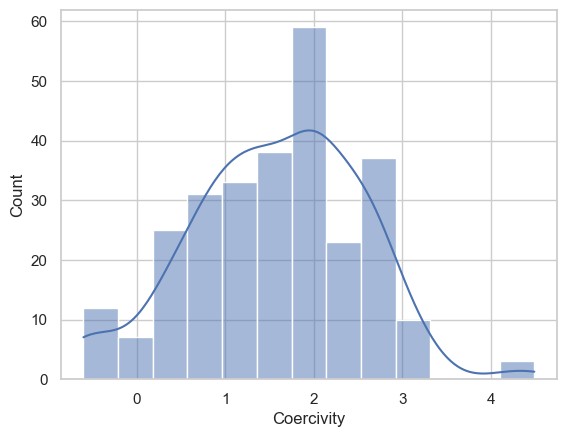

In [175]:
sns.histplot(df['Coercivity'], kde=True)

In [176]:
# Найти среднее значение без inf
mean_coercivity = np.mean(df['Coercivity'][np.isfinite(df['Coercivity'])])

# Заменить inf средним значением
df['Coercivity'] = df['Coercivity'].replace([np.inf, -np.inf], mean_coercivity)

In [177]:
# Проверка наличия inf во всех столбцах
inf_values = df.isin([np.inf, -np.inf]).any()
print("Столбцы с inf значениями:")
print(inf_values[inf_values].index)

Столбцы с inf значениями:
Index([], dtype='object')


In [178]:
df['Coercivity'] = coer

Похоже на логарифмическое рапределение Eff_anisotropy,  стоит ли тут почистить выбросы или преобразовать как Coercivity

In [ ]:
sns.histplot(df['Eff_anisotropy_const'], kde=True)

In [ ]:
df['Coercivity']

In [179]:
# Replace infinite values with NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaNs with mean values
df.fillna(df.mean(), inplace=True)

# Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
for i in df.columns:
    df[i] = scaler.fit_transform(df[[i]])
df['Coercivity'] = coer

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area/volume                    568 non-null    float64
 1   Max/min                        568 non-null    float64
 2   org_coating_HAcceptors         568 non-null    float64
 3   org_coating_LogP               568 non-null    float64
 4   common_spin                    568 non-null    float64
 5   Eff_anisotropy_const           568 non-null    float64
 6   Magnetic_anisotropy            568 non-null    float64
 7   Magnetocrystalline_anisotropy  568 non-null    float64
 8   Anisotropy constant            568 non-null    float64
 9   Crystalline                    568 non-null    float64
 10  MAE                            568 non-null    float64
 11  Curie_temperature              568 non-null    float64
 12  Spehricity                     568 non-null    flo

In [ ]:
df['Eff_anisotropy_const'] = quantile_transform(df[['Eff_anisotropy_const']], n_quantiles=562, output_distribution='normal')

Используем квантили, чтобы прийти к более нормальному виду,  уже лучше, но, наверное нужно убрать часть аномалий? Пока трогать не будем

In [ ]:
sns.histplot(df['Eff_anisotropy_const'], kde=True)

Преобразуем с помощью логарифма Anisotropy_constant

In [ ]:
df['Anisotropy constant '] = np.log1(df['Anisotropy constant '])

Как убрать появившиеся тут два пика? Может перевести в категориальный тип колонку Anisotropy constan? Пока трогать не будем

In [ ]:
sns.histplot(df['Anisotropy constant '], kde=True)

Нужно ли тут убрать аномалии в 'Electronegativity core'?

In [ ]:
for column in columns_to_check_min:
    min_value = df[column].min()
    print(min_value)
    df = df[df[column] != min_value]

In [ ]:
sns.histplot(df['Electronegativity core'], kde=True)

Переведём space group, Spehricity и crystalline в категориальный вид

In [ ]:
category_list = ['Spehricity', 'Crystalline', 'Space group']

In [ ]:
for i in category_list:
  df[i] = df[i].astype('category')

In [ ]:
df.info()

Как видно из распределений категориальных данных ниже, они все несбалансированные

In [ ]:
sns.histplot(df['Spehricity'])

In [ ]:
sns.histplot(df['Crystalline'])

In [ ]:
sns.histplot(df['Space group'])

In [181]:
df.to_csv('Distr_data_coer1.csv', index=False, float_format='%.3f') #сохраняем датасет